In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn import metrics
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

# Selection


In [21]:
final_dataset = pd.read_excel('./true.xlsx')

col = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율',
       'PER(IFRS-연결)_1일변화율', '순매수수량(개인)(20일합산)(주)_1일변화율',
       '종가 (60일 평균)(원)_1일변화율', '거래량 (20일 평균)(주)_1일변화율',
       '순매수수량(외국인계)(60일합산)(주)_1일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(외국인계)(주)_1일변화율', '순매수수량(기관계)(주)_1일변화율',
       '순매수수량(기관계)(60일합산)(주)_1일변화율', '순매수수량(개인)(주)_1일변화율',
       '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율', '종가 (120일 평균)(원)_1일변화율',
       '종가 (20일 평균)(원)_1일변화율', '순매수수량(개인)(60일합산)(주)_1일변화율',
       '거래량 (60일 평균)(주)_1일변화율', 'PCR(IFRS-연결)_1일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율', '순매수수량(기관계)(20일합산)(주)_1일변화율',
       '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율', '거래량 (5일 평균)(주)_1일변화율',
       '순매수수량(기관/외국인계)(주)_1일변화율', '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율',
       '순매수수량(외국인계)(20일합산)(주)_2일변화율', 'PER(IFRS-연결)_2일변화율',
       '순매수수량(개인)(20일합산)(주)_2일변화율', '종가 (60일 평균)(원)_2일변화율',
       '거래량 (20일 평균)(주)_2일변화율', '순매수수량(외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율', '순매수수량(외국인계)(주)_2일변화율',
       '순매수수량(기관계)(주)_2일변화율', '순매수수량(기관계)(60일합산)(주)_2일변화율',
       '순매수수량(개인)(주)_2일변화율', '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율',
       '종가 (120일 평균)(원)_2일변화율', '종가 (20일 평균)(원)_2일변화율',
       '순매수수량(개인)(60일합산)(주)_2일변화율', '거래량 (60일 평균)(주)_2일변화율',
       'PCR(IFRS-연결)_2일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율',
       '순매수수량(기관계)(20일합산)(주)_2일변화율', '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율',
       '거래량 (5일 평균)(주)_2일변화율', '순매수수량(기관/외국인계)(주)_2일변화율', '수익률(%)(2)', 'Name']

data =  final_dataset[col]


In [23]:
data.columns = dtd

In [24]:
data

,종가 (5일 평균)(원)_1일변화도,변동성 (5일)_1일변화도,순매수수량(외국인계)(20일합산)(주)_1일변화도,PER(IFRS-연결)_1일변화도,순매수수량(개인)(20일합산)(주)_1일변화도,종가 (60일 평균)(원)_1일변화도,거래량 (20일 평균)(주)_1일변화도,순매수수량(외국인계)(60일합산)(주)_1일변화도,순매수수량(기관/외국인계)(60일합산)(주)_1일변화도,순매수수량(외국인계)(주)_1일변화도,...,거래량 (60일 평균)(주)_2일변화도,PCR(IFRS-연결)_2일변화도,순매수수량(기관/외국인계)(20일합산)(주)_2일변화도,순매수수량(기관계)(20일합산)(주)_2일변화도,수익률 (1주)(%)_2일변화도,PBR(IFRS-연결)_2일변화도,거래량 (5일 평균)(주)_2일변화도,순매수수량(기관/외국인계)(주)_2일변화도,수익률(%)(2),Name
2013-06-05,0,0,1,0,1,1,1,1,0,1,...,1,1,1,0,0,1,1,1,1,코웨이
2013-06-07,1,0,0,1,1,1,0,1,1,0,...,1,1,0,0,1,1,1,0,0,코웨이
2013-06-10,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,코웨이
2013-06-11,0,0,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,코웨이
2013-06-12,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,코웨이
2013-06-13,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,코웨이
2013-06-14,0,0,0,0,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,코웨이
2013-06-17,0,0,0,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,0,0,코웨이
2013-06-18,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1,코웨이
2013-06-19,1,0,1,1,0,1,1,1,0,1,...,0,1,0,1,1,1,1,1,0,코웨이


In [11]:
asd = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율',
       'PER(IFRS-연결)_1일변화율', '순매수수량(개인)(20일합산)(주)_1일변화율',
       '종가 (60일 평균)(원)_1일변화율', '거래량 (20일 평균)(주)_1일변화율',
       '순매수수량(외국인계)(60일합산)(주)_1일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(외국인계)(주)_1일변화율', '순매수수량(기관계)(주)_1일변화율',
       '순매수수량(기관계)(60일합산)(주)_1일변화율', '순매수수량(개인)(주)_1일변화율',
       '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율', '종가 (120일 평균)(원)_1일변화율',
       '종가 (20일 평균)(원)_1일변화율', '순매수수량(개인)(60일합산)(주)_1일변화율',
       '거래량 (60일 평균)(주)_1일변화율', 'PCR(IFRS-연결)_1일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율', '순매수수량(기관계)(20일합산)(주)_1일변화율',
       '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율', '거래량 (5일 평균)(주)_1일변화율',
       '순매수수량(기관/외국인계)(주)_1일변화율', '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율',
       '순매수수량(외국인계)(20일합산)(주)_2일변화율', 'PER(IFRS-연결)_2일변화율',
       '순매수수량(개인)(20일합산)(주)_2일변화율', '종가 (60일 평균)(원)_2일변화율',
       '거래량 (20일 평균)(주)_2일변화율', '순매수수량(외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율', '순매수수량(외국인계)(주)_2일변화율',
       '순매수수량(기관계)(주)_2일변화율', '순매수수량(기관계)(60일합산)(주)_2일변화율',
       '순매수수량(개인)(주)_2일변화율', '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율',
       '종가 (120일 평균)(원)_2일변화율', '종가 (20일 평균)(원)_2일변화율',
       '순매수수량(개인)(60일합산)(주)_2일변화율', '거래량 (60일 평균)(주)_2일변화율',
       'PCR(IFRS-연결)_2일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율',
       '순매수수량(기관계)(20일합산)(주)_2일변화율', '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율',
       '거래량 (5일 평균)(주)_2일변화율', '순매수수량(기관/외국인계)(주)_2일변화율']

In [15]:
dtd = [x[:-1] + '도' for x in asd]

In [17]:
dtd.append('수익률(%)(2)')

In [18]:
dtd.append('Name')

In [19]:
dtd

['종가 (5일 평균)(원)_1일변화도',
 '변동성 (5일)_1일변화도',
 '순매수수량(외국인계)(20일합산)(주)_1일변화도',
 'PER(IFRS-연결)_1일변화도',
 '순매수수량(개인)(20일합산)(주)_1일변화도',
 '종가 (60일 평균)(원)_1일변화도',
 '거래량 (20일 평균)(주)_1일변화도',
 '순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도',
 '순매수수량(기관계)(60일합산)(주)_1일변화도',
 '순매수수량(개인)(주)_1일변화도',
 '외국인보유비중(티커)(%)_1일변화도',
 'PSR(IFRS-연결)_1일변화도',
 '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도',
 '순매수수량(개인)(60일합산)(주)_1일변화도',
 '거래량 (60일 평균)(주)_1일변화도',
 'PCR(IFRS-연결)_1일변화도',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화도',
 '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '수익률 (1주)(%)_1일변화도',
 'PBR(IFRS-연결)_1일변화도',
 '거래량 (5일 평균)(주)_1일변화도',
 '순매수수량(기관/외국인계)(주)_1일변화도',
 '종가 (5일 평균)(원)_2일변화도',
 '변동성 (5일)_2일변화도',
 '순매수수량(외국인계)(20일합산)(주)_2일변화도',
 'PER(IFRS-연결)_2일변화도',
 '순매수수량(개인)(20일합산)(주)_2일변화도',
 '종가 (60일 평균)(원)_2일변화도',
 '거래량 (20일 평균)(주)_2일변화도',
 '순매수수량(외국인계)(60일합산)(주)_2일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_2일변화도',
 '순매수수량(외국인계)(주)_2일변화도',
 '순매수수량(기관계)(주)_2일변화도',
 '순매수수량(기관계)(6

In [3]:
len(col)

54

*******************s**코웨이*********************


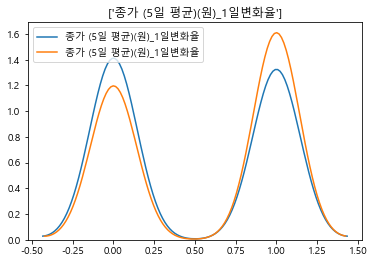

*******************s**코웨이*********************


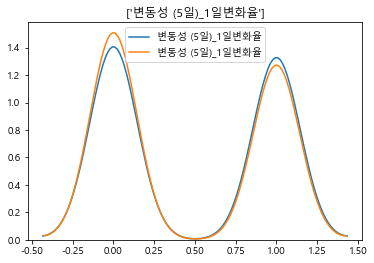

*******************s**코웨이*********************


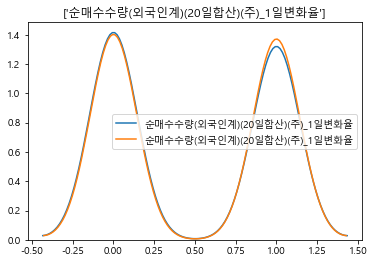

*******************s**코웨이*********************


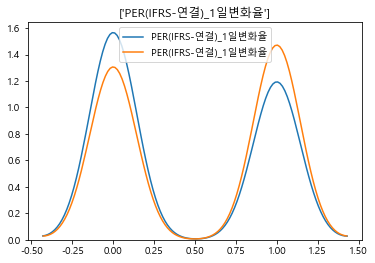

*******************s**코웨이*********************


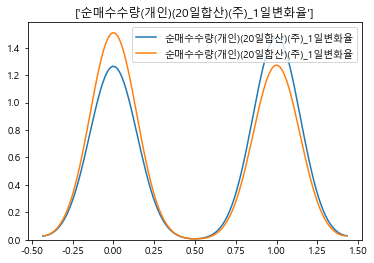

*******************s**코웨이*********************


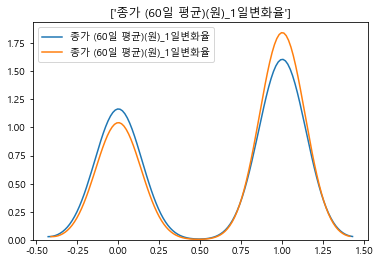

*******************s**코웨이*********************


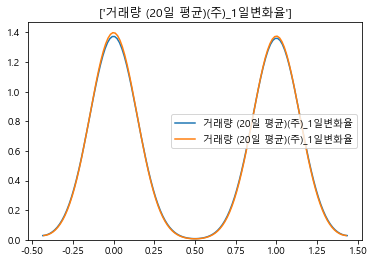

*******************s**코웨이*********************


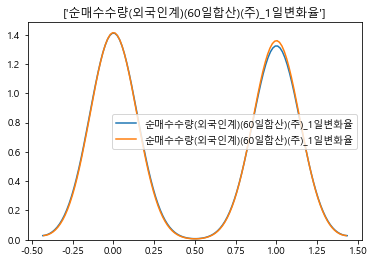

*******************s**코웨이*********************


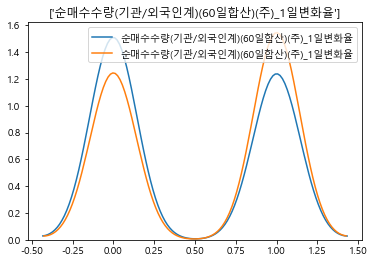

*******************s**코웨이*********************


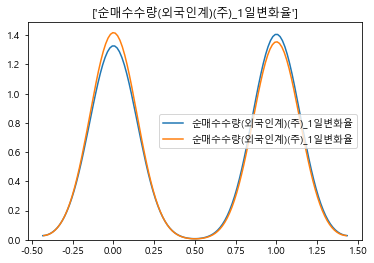

*******************s**코웨이*********************


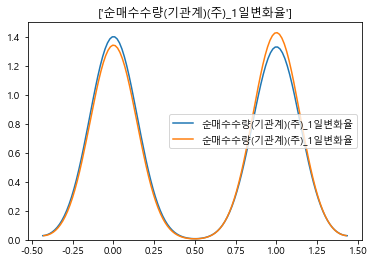

*******************s**코웨이*********************


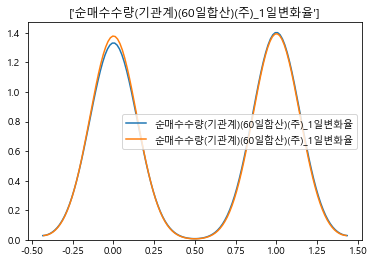

*******************s**코웨이*********************


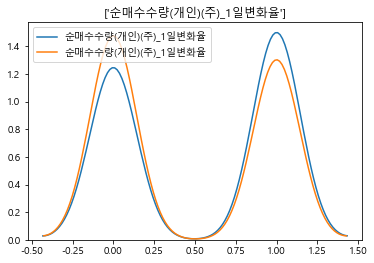

*******************s**코웨이*********************


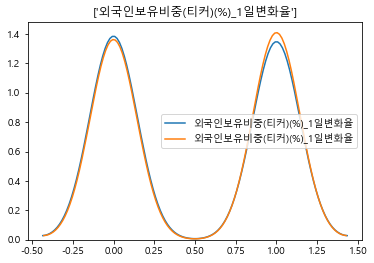

*******************s**코웨이*********************


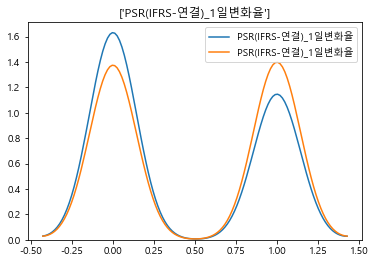

*******************s**코웨이*********************


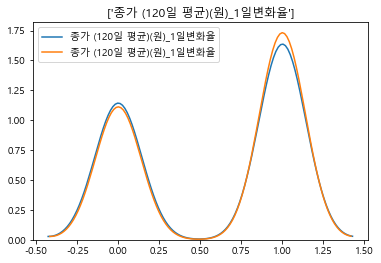

*******************s**코웨이*********************


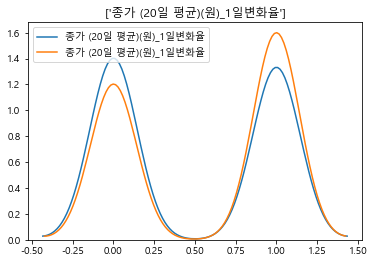

*******************s**코웨이*********************


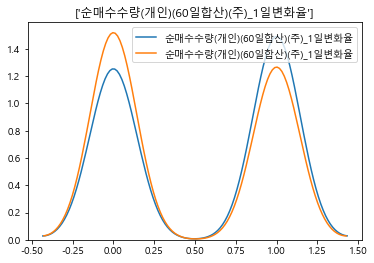

*******************s**코웨이*********************


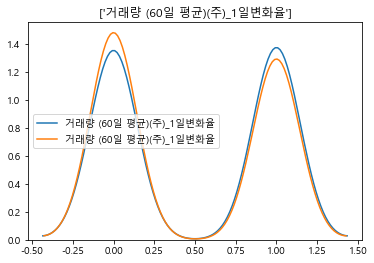

*******************s**코웨이*********************


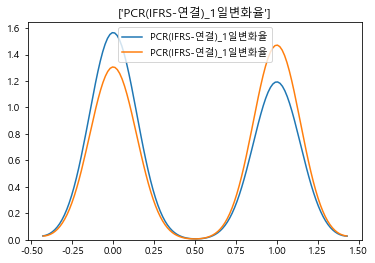

*******************s**코웨이*********************


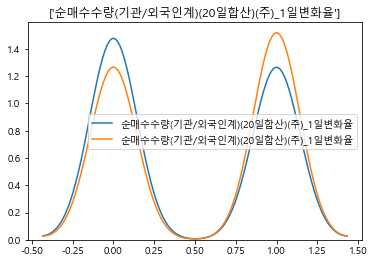

*******************s**코웨이*********************


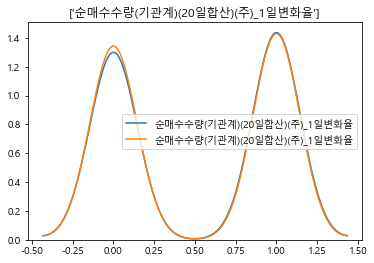

*******************s**코웨이*********************


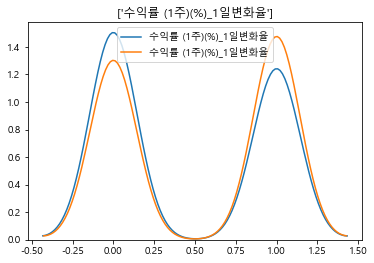

*******************s**코웨이*********************


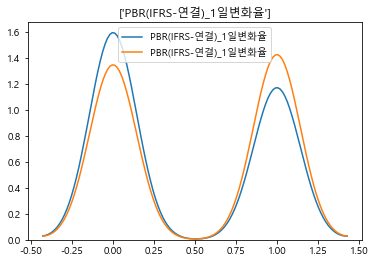

*******************s**코웨이*********************


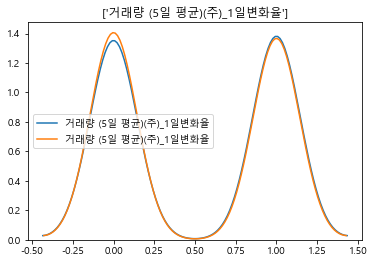

*******************s**코웨이*********************


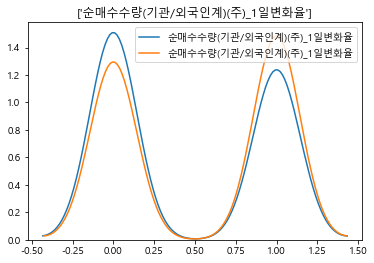

*******************s**코웨이*********************


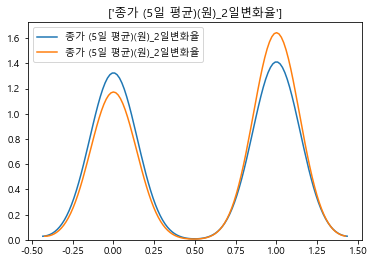

*******************s**코웨이*********************


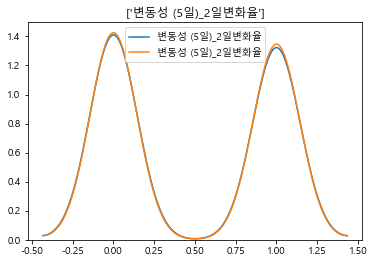

*******************s**코웨이*********************


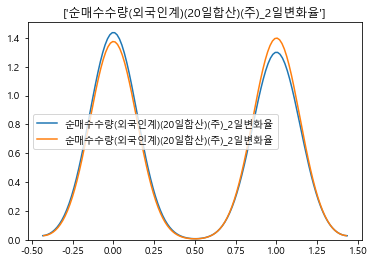

*******************s**코웨이*********************


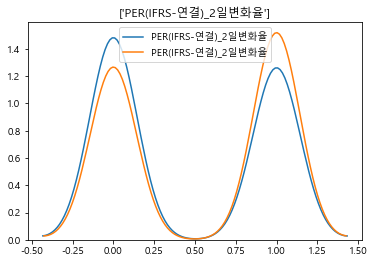

*******************s**코웨이*********************


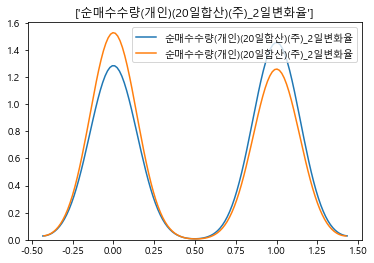

*******************s**코웨이*********************


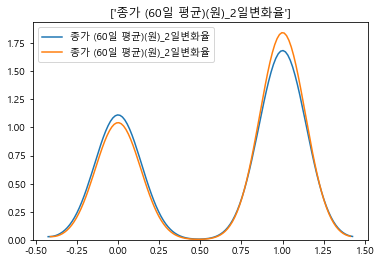

*******************s**코웨이*********************


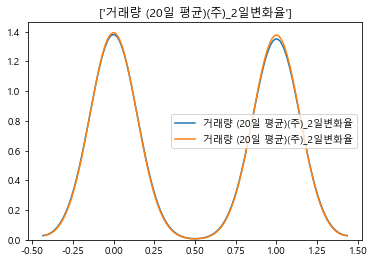

*******************s**코웨이*********************


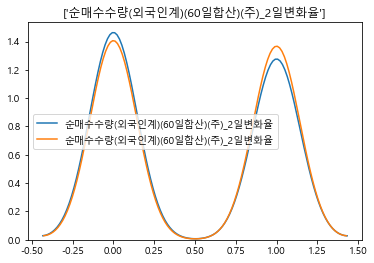

*******************s**코웨이*********************


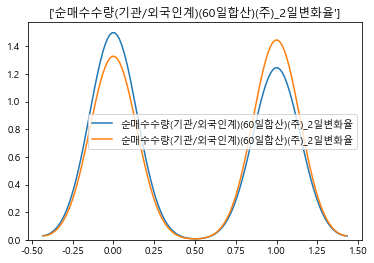

*******************s**코웨이*********************


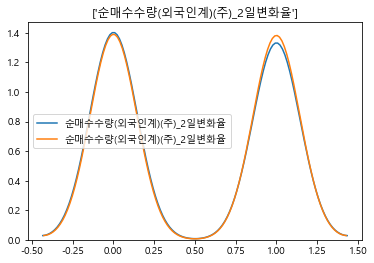

*******************s**코웨이*********************


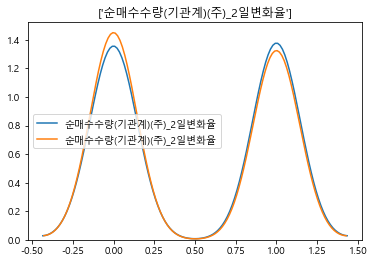

*******************s**코웨이*********************


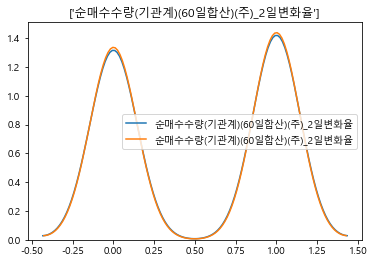

*******************s**코웨이*********************


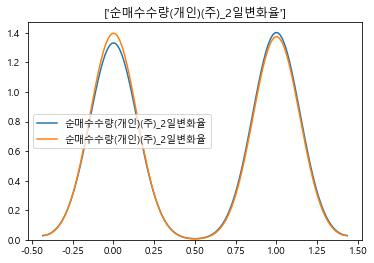

*******************s**코웨이*********************


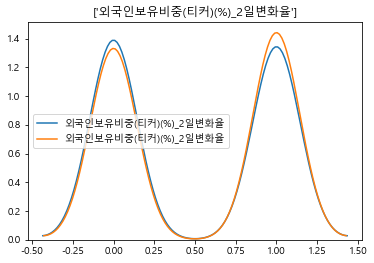

*******************s**코웨이*********************


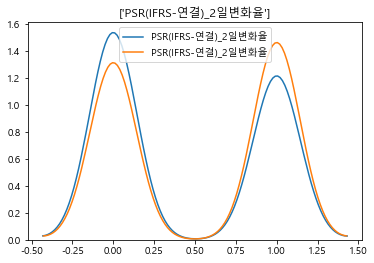

*******************s**코웨이*********************


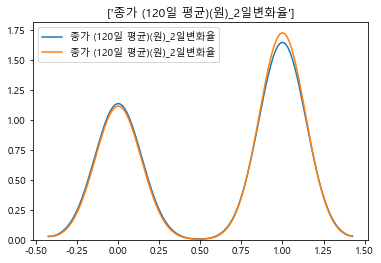

*******************s**코웨이*********************


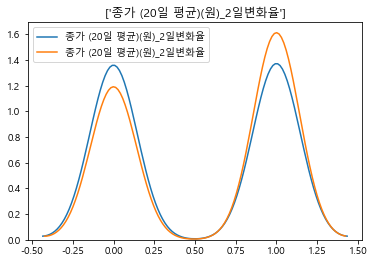

*******************s**코웨이*********************


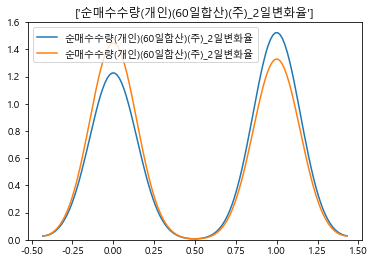

*******************s**코웨이*********************


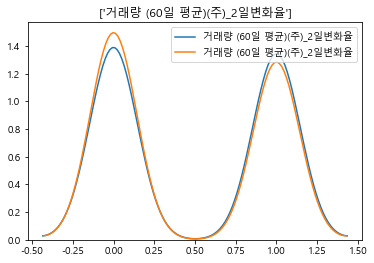

*******************s**코웨이*********************


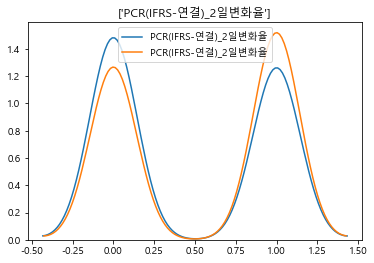

*******************s**코웨이*********************


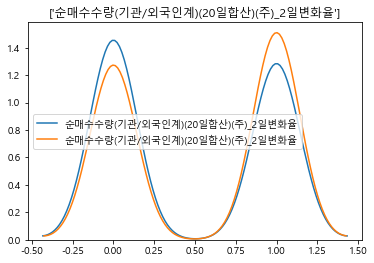

*******************s**코웨이*********************


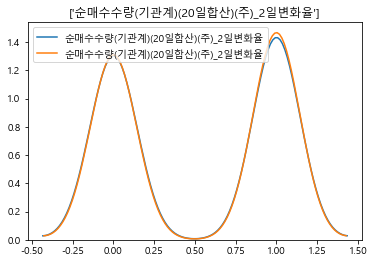

*******************s**코웨이*********************


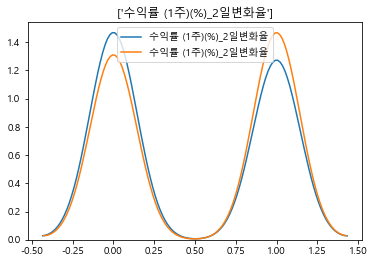

*******************s**코웨이*********************


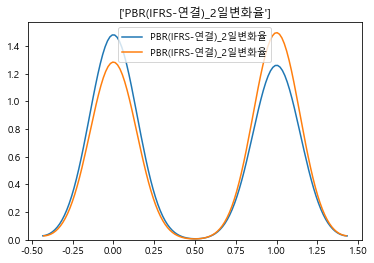

*******************s**코웨이*********************


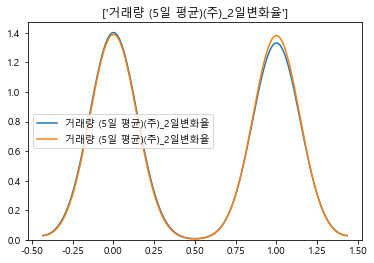

*******************s**코웨이*********************


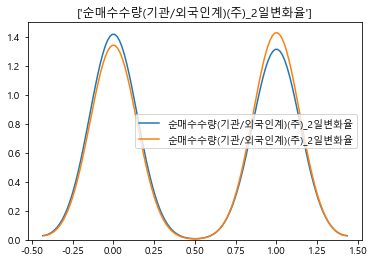

*******************s**코웨이*********************


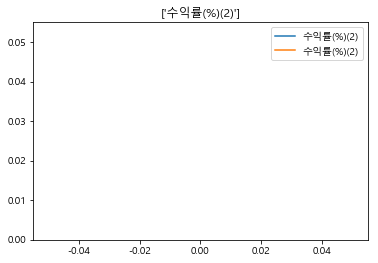

In [4]:
K='코웨이'
for i in col[:-1]:
    sns.kdeplot(data=data[data['수익률(%)(2)'] == 1][i])
    sns.kdeplot(data=data[data['수익률(%)(2)'] == 0][i])
    plt.title([i])
    print('*******************s**{}*********************'.format(K))
    plt.show()

In [26]:
def data_sp(data,day):
    com_name_set = list(set(data.Name))
    
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-day])
        test_set = test_set.append(sub_set[-day:])
    return train_set , test_set

In [27]:
train, test = data_sp(data,60)

In [28]:
print(train.shape,test.shape)

(1305, 54) (60, 54)


### 2진화한 데이터셋 분석
## xgboost

In [29]:
## 60일 결과

colsss = ['종가 (5일 평균)(원)_1일변화도', '변동성 (5일)_1일변화도', '순매수수량(외국인계)(20일합산)(주)_1일변화도',
 'PER(IFRS-연결)_1일변화도', '순매수수량(개인)(20일합산)(주)_1일변화도', '종가 (60일 평균)(원)_1일변화도',
 '거래량 (20일 평균)(주)_1일변화도', '순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도', '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도', '순매수수량(기관계)(60일합산)(주)_1일변화도', '순매수수량(개인)(주)_1일변화도',
 '외국인보유비중(티커)(%)_1일변화도', 'PSR(IFRS-연결)_1일변화도', '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도', '순매수수량(개인)(60일합산)(주)_1일변화도', '거래량 (60일 평균)(주)_1일변화도',
 'PCR(IFRS-연결)_1일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화도', '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '수익률 (1주)(%)_1일변화도', 'PBR(IFRS-연결)_1일변화도', '거래량 (5일 평균)(주)_1일변화도', '순매수수량(기관/외국인계)(주)_1일변화도',
 '종가 (5일 평균)(원)_2일변화도', '변동성 (5일)_2일변화도', '순매수수량(외국인계)(20일합산)(주)_2일변화도',
 'PER(IFRS-연결)_2일변화도', '순매수수량(개인)(20일합산)(주)_2일변화도', '종가 (60일 평균)(원)_2일변화도',
 '거래량 (20일 평균)(주)_2일변화도', '순매수수량(외국인계)(60일합산)(주)_2일변화도', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화도',
 '순매수수량(외국인계)(주)_2일변화도', '순매수수량(기관계)(주)_2일변화도', '순매수수량(기관계)(60일합산)(주)_2일변화도',
 '순매수수량(개인)(주)_2일변화도', '외국인보유비중(티커)(%)_2일변화도', 'PSR(IFRS-연결)_2일변화도',
 '종가 (120일 평균)(원)_2일변화도', '종가 (20일 평균)(원)_2일변화도', '순매수수량(개인)(60일합산)(주)_2일변화도',
 '거래량 (60일 평균)(주)_2일변화도', 'PCR(IFRS-연결)_2일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화도',
 '순매수수량(기관계)(20일합산)(주)_2일변화도', '수익률 (1주)(%)_2일변화도', 'PBR(IFRS-연결)_2일변화도',
 '거래량 (5일 평균)(주)_2일변화도', '순매수수량(기관/외국인계)(주)_2일변화도']

accsets = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(42):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier( n_jobs= -1)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets['features'][i] = colsss
    accsets['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets


,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.718008,0.616667,0.593750,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",52.0
1,0.718008,0.616667,0.593750,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",49.0
2,0.714943,0.650000,0.625000,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",47.0
3,0.714943,0.650000,0.625000,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",46.0
4,0.724904,0.566667,0.548387,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",45.0
5,0.714943,0.583333,0.558824,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",44.0
6,0.719540,0.583333,0.558824,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",43.0
7,0.720307,0.583333,0.555556,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",42.0
8,0.728736,0.583333,0.555556,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",41.0
9,0.717241,0.633333,0.606061,"[종가 (5일 평균)(원)_1일변화도, 변동성 (5일)_1일변화도, 순매수수량(외국...",40.0


In [30]:
accsets.iloc[25:36,:3]

,train_val_pro,test_pro,pre_pro
25,0.689655,0.550000,0.531250
26,0.690421,0.600000,0.567568
27,0.681992,0.566667,0.540541
28,0.672797,0.700000,0.657143
29,0.672797,0.700000,0.648649
30,0.659770,0.650000,0.611111
31,0.652874,0.666667,0.628571
32,0.642912,0.566667,0.551724
33,0.629885,0.550000,0.527778
34,0.626054,0.566667,0.548387


In [31]:
accsets.iloc[28,3]

['순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도',
 '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도',
 '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '거래량 (5일 평균)(주)_1일변화도',
 '순매수수량(기관/외국인계)(주)_1일변화도',
 'PER(IFRS-연결)_2일변화도',
 '종가 (60일 평균)(원)_2일변화도',
 '순매수수량(외국인계)(60일합산)(주)_2일변화도',
 '거래량 (60일 평균)(주)_2일변화도',
 '수익률 (1주)(%)_2일변화도',
 '거래량 (5일 평균)(주)_2일변화도']

In [9]:
train, test = data_sp(data,90)

In [10]:
## 90일 결과

colsss = ['종가 (5일 평균)(원)_1일변화도', '변동성 (5일)_1일변화도', '순매수수량(외국인계)(20일합산)(주)_1일변화도',
 'PER(IFRS-연결)_1일변화도', '순매수수량(개인)(20일합산)(주)_1일변화도', '종가 (60일 평균)(원)_1일변화도',
 '거래량 (20일 평균)(주)_1일변화도', '순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도', '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도', '순매수수량(기관계)(60일합산)(주)_1일변화도', '순매수수량(개인)(주)_1일변화도',
 '외국인보유비중(티커)(%)_1일변화도', 'PSR(IFRS-연결)_1일변화도', '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도', '순매수수량(개인)(60일합산)(주)_1일변화도', '거래량 (60일 평균)(주)_1일변화도',
 'PCR(IFRS-연결)_1일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화도', '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '수익률 (1주)(%)_1일변화도', 'PBR(IFRS-연결)_1일변화도', '거래량 (5일 평균)(주)_1일변화도', '순매수수량(기관/외국인계)(주)_1일변화도',
 '종가 (5일 평균)(원)_2일변화도', '변동성 (5일)_2일변화도', '순매수수량(외국인계)(20일합산)(주)_2일변화도',
 'PER(IFRS-연결)_2일변화도', '순매수수량(개인)(20일합산)(주)_2일변화도', '종가 (60일 평균)(원)_2일변화도',
 '거래량 (20일 평균)(주)_2일변화도', '순매수수량(외국인계)(60일합산)(주)_2일변화도', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화도',
 '순매수수량(외국인계)(주)_2일변화도', '순매수수량(기관계)(주)_2일변화도', '순매수수량(기관계)(60일합산)(주)_2일변화도',
 '순매수수량(개인)(주)_2일변화도', '외국인보유비중(티커)(%)_2일변화도', 'PSR(IFRS-연결)_2일변화도',
 '종가 (120일 평균)(원)_2일변화도', '종가 (20일 평균)(원)_2일변화도', '순매수수량(개인)(60일합산)(주)_2일변화도',
 '거래량 (60일 평균)(주)_2일변화도', 'PCR(IFRS-연결)_2일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화도',
 '순매수수량(기관계)(20일합산)(주)_2일변화도', '수익률 (1주)(%)_2일변화도', 'PBR(IFRS-연결)_2일변화도',
 '거래량 (5일 평균)(주)_2일변화도', '순매수수량(기관/외국인계)(주)_2일변화도']

accsets2 = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(41):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_jobs= -1)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets2['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets2['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets2['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets2['features'][i] = colsss
    accsets2['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets2


,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.727843,0.622222,0.627907,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",52.0
1,0.727843,0.622222,0.627907,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",48.0
2,0.727059,0.600000,0.600000,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",47.0
3,0.723922,0.566667,0.571429,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",46.0
4,0.724706,0.577778,0.585366,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",45.0
5,0.731765,0.566667,0.575000,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",44.0
6,0.716863,0.633333,0.650000,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",43.0
7,0.717647,0.633333,0.642857,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",42.0
8,0.719216,0.588889,0.590909,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 종가 (60일 ...",39.0
9,0.722353,0.622222,0.617021,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 종가 (60일 ...",38.0


In [11]:
train, test = data_sp(data,120)

In [12]:
## 120일 결과

colsss = ['종가 (5일 평균)(원)_1일변화도', '변동성 (5일)_1일변화도', '순매수수량(외국인계)(20일합산)(주)_1일변화도',
 'PER(IFRS-연결)_1일변화도', '순매수수량(개인)(20일합산)(주)_1일변화도', '종가 (60일 평균)(원)_1일변화도',
 '거래량 (20일 평균)(주)_1일변화도', '순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도', '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도', '순매수수량(기관계)(60일합산)(주)_1일변화도', '순매수수량(개인)(주)_1일변화도',
 '외국인보유비중(티커)(%)_1일변화도', 'PSR(IFRS-연결)_1일변화도', '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도', '순매수수량(개인)(60일합산)(주)_1일변화도', '거래량 (60일 평균)(주)_1일변화도',
 'PCR(IFRS-연결)_1일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화도', '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '수익률 (1주)(%)_1일변화도', 'PBR(IFRS-연결)_1일변화도', '거래량 (5일 평균)(주)_1일변화도', '순매수수량(기관/외국인계)(주)_1일변화도',
 '종가 (5일 평균)(원)_2일변화도', '변동성 (5일)_2일변화도', '순매수수량(외국인계)(20일합산)(주)_2일변화도',
 'PER(IFRS-연결)_2일변화도', '순매수수량(개인)(20일합산)(주)_2일변화도', '종가 (60일 평균)(원)_2일변화도',
 '거래량 (20일 평균)(주)_2일변화도', '순매수수량(외국인계)(60일합산)(주)_2일변화도', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화도',
 '순매수수량(외국인계)(주)_2일변화도', '순매수수량(기관계)(주)_2일변화도', '순매수수량(기관계)(60일합산)(주)_2일변화도',
 '순매수수량(개인)(주)_2일변화도', '외국인보유비중(티커)(%)_2일변화도', 'PSR(IFRS-연결)_2일변화도',
 '종가 (120일 평균)(원)_2일변화도', '종가 (20일 평균)(원)_2일변화도', '순매수수량(개인)(60일합산)(주)_2일변화도',
 '거래량 (60일 평균)(주)_2일변화도', 'PCR(IFRS-연결)_2일변화도', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화도',
 '순매수수량(기관계)(20일합산)(주)_2일변화도', '수익률 (1주)(%)_2일변화도', 'PBR(IFRS-연결)_2일변화도',
 '거래량 (5일 평균)(주)_2일변화도', '순매수수량(기관/외국인계)(주)_2일변화도']

accsets3 = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(44):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_jobs= -1)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets3['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets3['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets3['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets3['features'][i] = colsss
    accsets3['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets3


,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.731727,0.575000,0.576271,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",52.0
1,0.731727,0.575000,0.576271,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",49.0
2,0.736546,0.583333,0.586207,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",47.0
3,0.730924,0.541667,0.543860,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",45.0
4,0.726908,0.550000,0.555556,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",44.0
5,0.727711,0.575000,0.578947,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",42.0
6,0.737349,0.550000,0.553571,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",41.0
7,0.738153,0.566667,0.580000,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",39.0
8,0.727711,0.558333,0.561404,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",38.0
9,0.726908,0.525000,0.528302,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, PER(IFRS...",37.0


Text(0.5, 0, '변수 제거 단계')

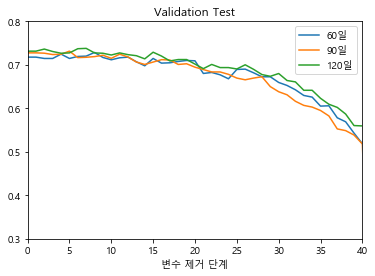

In [48]:
plt.plot(accsets['train_val_pro'],label="60일")
plt.plot(accsets2['train_val_pro'],label="90일")
plt.plot(accsets3['train_val_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.3, 0.8)
plt.title('Validation Test')
plt.xlabel('변수 제거 단계')

Text(0.5, 0, '변수 제거 단계')

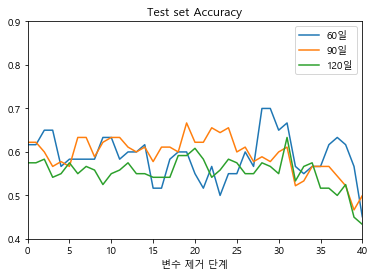

In [53]:
plt.plot(accsets['test_pro'],label="60일")
plt.plot(accsets2['test_pro'],label="90일")
plt.plot(accsets3['test_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.4, 0.9)
plt.title('Test set Accuracy')
plt.xlabel('변수 제거 단계')

Text(0.5, 0, '변수 제거 단계')

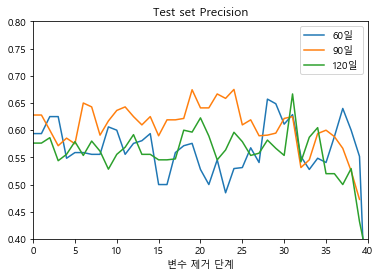

In [13]:
plt.plot(accsets['pre_pro'],label="60일")
plt.plot(accsets2['pre_pro'],label="90일")
plt.plot(accsets3['pre_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.4, 0.8)
plt.title('Test set Precision')
plt.xlabel('변수 제거 단계')

Text(0.5, 0, '변수 제거 단계')

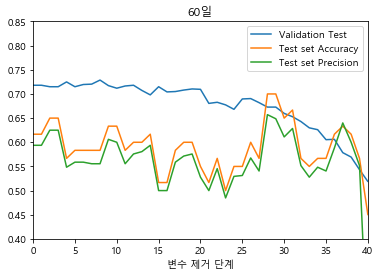

In [16]:
plt.plot(accsets['train_val_pro'],label="Validation Test")
plt.plot(accsets['test_pro'],label="Test set Accuracy")
plt.plot(accsets['pre_pro'],label="Test set Precision")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.4, 0.85)
plt.title('60일')
plt.xlabel('변수 제거 단계')

In [59]:
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화도',
     '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도',
     '순매수수량(외국인계)(주)_1일변화도',
     '순매수수량(기관계)(주)_1일변화도',
     '종가 (120일 평균)(원)_1일변화도',
     '종가 (20일 평균)(원)_1일변화도',
     '순매수수량(기관계)(20일합산)(주)_1일변화도',
     '거래량 (5일 평균)(주)_1일변화도',
     '순매수수량(기관/외국인계)(주)_1일변화도',
     'PER(IFRS-연결)_2일변화도',
     '종가 (60일 평균)(원)_2일변화도',
     '순매수수량(외국인계)(60일합산)(주)_2일변화도',
     '거래량 (60일 평균)(주)_2일변화도',
     '수익률 (1주)(%)_2일변화도',
     '거래량 (5일 평균)(주)_2일변화도']

## 70% 이상 같은 변수들을 1개씩 지우고 성능 변화 체크
 - 성능이 많이 떨어진다 그러므로 다 넣어서 분석

In [60]:
train, test = data_sp(data,60)

In [61]:
## 동질성을 가지는 칼럼 파악
for i in colsss:
    for k in colsss:
        if i != k and (final_dataset[i] == final_dataset[k]).sum()/len(final_dataset)>0.7:
            print(i,k,(final_dataset[i] == final_dataset[k]).sum()/len(final_dataset))

순매수수량(외국인계)(60일합산)(주)_1일변화율 순매수수량(외국인계)(60일합산)(주)_2일변화율 0.7978021978021979
종가 (120일 평균)(원)_1일변화율 종가 (60일 평균)(원)_2일변화율 0.747985347985348
거래량 (5일 평균)(주)_1일변화율 거래량 (5일 평균)(주)_2일변화율 0.8124542124542125
PER(IFRS-연결)_2일변화율 수익률 (1주)(%)_2일변화율 0.734065934065934
종가 (60일 평균)(원)_2일변화율 종가 (120일 평균)(원)_1일변화율 0.747985347985348
순매수수량(외국인계)(60일합산)(주)_2일변화율 순매수수량(외국인계)(60일합산)(주)_1일변화율 0.7978021978021979
수익률 (1주)(%)_2일변화율 PER(IFRS-연결)_2일변화율 0.734065934065934
거래량 (5일 평균)(주)_2일변화율 거래량 (5일 평균)(주)_1일변화율 0.8124542124542125


In [ ]:
validation                                                   0.672797
test_pro                                                          0.7
pre_pro                                                      0.657143

In [64]:
#순매수수량(외국인계)(60일합산)(주)_1일변화율
colsss = [
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.6728, acc: 0.7, pre:0.64865


In [67]:
# '순매수수량(외국인계)(60일합산)(주)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
          
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier( n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.65977, acc: 0.68333, pre:0.64706


In [68]:
# '순매수수량(외국인계)(60일합산)(주)_1일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']
X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.72567, acc: 0.68333, pre:0.63158


In [69]:
# 거래량 (5일 평균)(주)_1일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.73487, acc: 0.61667, pre:0.58824


In [70]:
# '거래량 (5일 평균)(주)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',]

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.7295, acc: 0.61667, pre:0.57895


In [71]:
#  수익률 (1주)(%)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 
 '거래량 (5일 평균)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.7295, acc: 0.68333, pre:0.66667


In [72]:
#  PER(IFRS-연결)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']
X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.72107, acc: 0.61667, pre:0.6


In [ ]:
#  PER(IFRS-연결)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']
X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

In [ ]:
종가 (60일 평균)(원)_2일변화율 종가

In [73]:
#  PER(IFRS-연결)_2일변화율
colsss = ['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']
X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.72107, acc: 0.61667, pre:0.6


비슷한 변수들을 지워도 acc와 pre가 향상되지 않았으므로 그대로 사용한다.

## 최종적으로 사용할  변수

In [35]:
col = ['순매수수량(외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화도',
 '순매수수량(외국인계)(주)_1일변화도',
 '순매수수량(기관계)(주)_1일변화도',
 '종가 (120일 평균)(원)_1일변화도',
 '종가 (20일 평균)(원)_1일변화도',
 '순매수수량(기관계)(20일합산)(주)_1일변화도',
 '거래량 (5일 평균)(주)_1일변화도',
 '순매수수량(기관/외국인계)(주)_1일변화도',
 'PER(IFRS-연결)_2일변화도',
 '종가 (60일 평균)(원)_2일변화도',
 '순매수수량(외국인계)(60일합산)(주)_2일변화도',
 '거래량 (60일 평균)(주)_2일변화도',
 '수익률 (1주)(%)_2일변화도',
 '거래량 (5일 평균)(주)_2일변화도']

In [36]:
X_train = train[col]
X_test = test[col]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier( n_jobs = -1)
model.fit(X_train[col] ,Y_train)
a = model.predict(X_train[col])
b = model.predict(X_test[col])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.6728, acc: 0.7, pre:0.65714


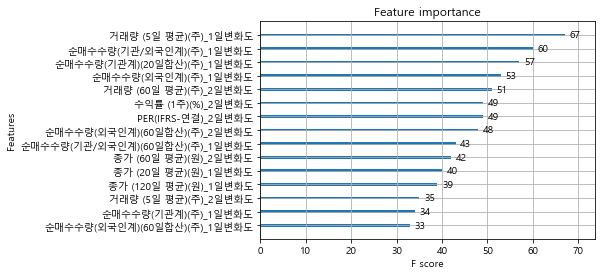

In [37]:
plot_importance(model)

### 이 후 부터는파라미터 튜닝을 해야해서 다른 컴퓨터에서 진행해서 파일이 다릅니다!!
parameter_tuning 파일을 참고해주세요